In [1]:
%matplotlib inline

## Plotting RMSF (with bootstrapping)

This notebook plots the RMSF of multiple components of the exit tunnel.

The RMSF has been previously calculated with gromacs (gmx rmsf, version 2018.2) using the center of mass trajectories. 

Bootstrapping was used to generate new trajectories (5 experiments selecting 5 trajectories, with replacement).



## IMPORT LIBRARIES

In [2]:
import matplotlib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import Image

In [3]:
def load_panda_boots(rmsfdir,nboots, system, section):
    """This function reads RMSF files and outputs numpy array
    Input: nbooots RMSF output files located in rmsfdir directory
    Output: Returns the RMSF output files as a list
    """
    alist=[]
    
    for boots in range(nboots):   
        rmsf_file = np.genfromtxt(rmsfdir+'rmsf_%s_run%d_%s.xvg'% (system, boots+1, section) , skip_header=17,usecols=1)
        alist.append(rmsf_file)
    
    return(alist)

In [4]:
def av_stdev_panda_boots(rmsfdir0,nboots, system, section):
    """average and stdev from bootstraps of RMSF
    Inputs:
    rmsfdir0=STR directory RMSF
    nboots=INT number of bootstraps
    ni=INT initial index of atoms to be compared
    nf=INT final index of atoms to be compare
    
    Output: average RMSF and STDEV for each position in range (ni,nf)
    
    """
    
    #Load data into panda dataframes
    
    alist=load_panda_boots(rmsfdir0,nboots, system, section)
    df0=pd.DataFrame.from_records(alist) 
    
    #calculate average and stdev of each column (for each frame, calculate average of bootstraps)
    avboot0=df0.mean(axis=0)
    devboot0=df0.std(axis=0)
    
    #return average and stdev
    
    return(avboot0, devboot0)

In [5]:
def plot_panda_boots_comparison_RNA_4comp(rmsfdir,system0,system1, system2, system3,
                                    nboots, plottitle, section):
    
    #natoms=nf-ni
    #x=np.arange(natoms)    
    
    avboot0,devboot0=av_stdev_panda_boots(rmsfdir,nboots, system0, section)
    avboot1,devboot1=av_stdev_panda_boots(rmsfdir,nboots, system1, section)
    avboot2,devboot2=av_stdev_panda_boots(rmsfdir,nboots, system2, section)
    avboot3,devboot3=av_stdev_panda_boots(rmsfdir,nboots, system3, section)
    
    x=np.arange(len(avboot0))
    
    axRMSF = plt.axes()
    axRMSF.set_xlabel('Atom ID')    
    axRMSF.set_ylabel('RMSF (nm)')

    plt.errorbar(x,avboot0,yerr=devboot0,linewidth=1, elinewidth=0.25, label=system0)
    plt.errorbar(x,avboot1,yerr=devboot1,linewidth=1, elinewidth=0.25, label=system1)
    plt.errorbar(x,avboot2,yerr=devboot0,linewidth=1, elinewidth=0.25, label=system2)
    plt.errorbar(x,avboot3,yerr=devboot1,linewidth=1, elinewidth=0.25, label=system3)

    xmin, xmax, ymin, ymax = plt.axis([-2, len(avboot0)+1, 0.0, 0.8])
    
    #plt.axvline(x=14,ls='-.', linewidth=0.25)
    #plt.axvline(x=18.5,ls='--', linewidth=0.25)


    plt.title(plottitle)
    plt.legend(loc='upper right')
    plt.savefig("%s/%s.pdf" % (outdir,section))
    plt.show()

In [68]:
def plot_panda_boots_comparison_RNA_4comp_V2(rmsfdir,system0,system1, system2, system3,
                                    nboots, plottitle, section):
    
    #natoms=nf-ni
    #x=np.arange(natoms)    
    
    avboot0,devboot0=av_stdev_panda_boots(rmsfdir,nboots, system0, section)
    avboot1,devboot1=av_stdev_panda_boots(rmsfdir,nboots, system1, section)
    avboot2,devboot2=av_stdev_panda_boots(rmsfdir,nboots, system2, section)
    avboot3,devboot3=av_stdev_panda_boots(rmsfdir,nboots, system3, section)
    
    x=np.arange(len(avboot0))
    
    axRMSF = plt.axes()
    axRMSF.set_xlabel('Residue number')    
    axRMSF.set_ylabel('RMSF (nm)')

    plt.errorbar(x,avboot0,yerr=devboot0,linewidth=1, elinewidth=0.25, label=system0)
    plt.errorbar(x,avboot1,yerr=devboot1,linewidth=1, elinewidth=0.25, label=r'N$^{-12}$')#label=system1)
    plt.errorbar(x,avboot2,yerr=devboot0,linewidth=1, elinewidth=0.25, label=r'K$^{-12}$')#system2)
    plt.errorbar(x,avboot3,yerr=devboot1,linewidth=1, elinewidth=0.25, label=system3)

    xmin, xmax, ymin, ymax = plt.axis([-2, len(avboot0)+1, 0.0, 0.8])
    
    if section == 'tRNA':
        x_labels = range(27,len(avboot0)+27,5)
        plt.xticks(ticks=range(-2,len(avboot0)+1,5),labels=x_labels)
        plt.title('RMSF tRNA')
    if section == 'RNATUNNEL':
        x_labels = [452,491,741,785,1255,1312,1609,1779,2011,2055,2438,2500,2572,2600]
        plt.xticks(ticks=[3,23,31,42,54,62,76,84,90,96,111,125,136,153],labels=x_labels)
        plt.xticks(rotation=90, ha="center")
        plt.title('RMSF Nucleic Acids in ET')
    if section == 'NPEPTIDE':
        x_labels = range(-26,len(avboot0)+3,5)
        plt.xticks(ticks=range(0,len(avboot0)+1,5),labels=x_labels)
        plt.axvline(x=13.5,ls='-.', linewidth=0.25)
        plt.axvline(x=18.5,ls='--', linewidth=0.25)
        plt.title('RMSF NC')
    if section == 'UL4':
        x_labels = range(57,len(avboot0)+57,5)
        plt.xticks(ticks=range(0,len(avboot0)+1,5),labels=x_labels)
        plt.title('RMSF uL4 Loop')
    if section == 'UL22':
        x_labels = [8,79,84,89,94,99]
        plt.xticks(ticks=[0,5,10,15,20,25],labels=x_labels)
        plt.title('RMSF uL22 Loop')
    if section == 'UL23':
        x_labels = range(67,len(avboot0)+67,2)
        plt.xticks(ticks=range(0,len(avboot0)+1,2),labels=x_labels)
        plt.title('RMSF uL23 Loop')
    
        

        
        
    
    #plt.axvline(x=14,ls='-.', linewidth=0.25)
    #plt.axvline(x=18.5,ls='--', linewidth=0.25)


    #plt.title(plottitle)
    plt.legend(loc='upper right')
    plt.savefig("%s/%s.png" % (outdir,section), dpi=300 )
    plt.show()

In [49]:
rmsfdir="/Users/fatima/Stanford/70S/CombinedAnalysis/RMSF_25MAY2023/"
outdir="/Users/fatima/Stanford/WritingSecM/RMSF_07MAR2024/"

In [8]:
SYSTEMS=['tRNA', 'RNATUNNEL','NPEPTIDE','UL4','UL22','UL23']

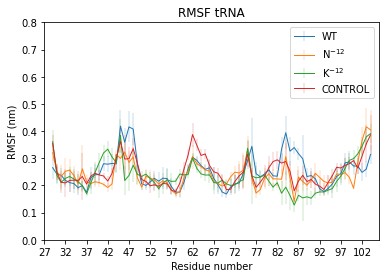

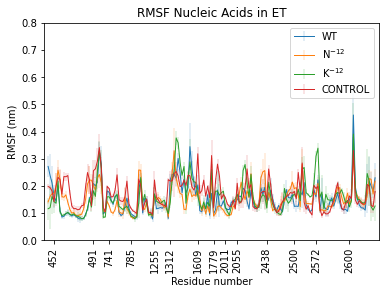

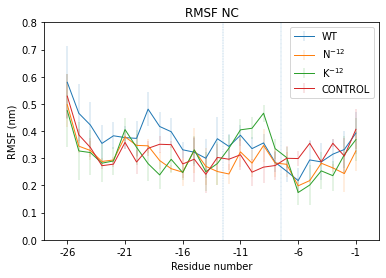

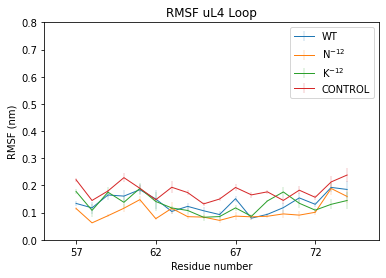

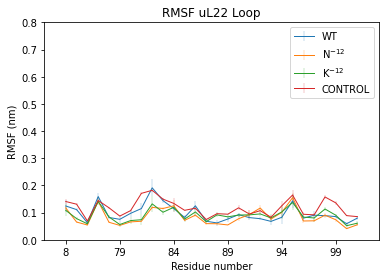

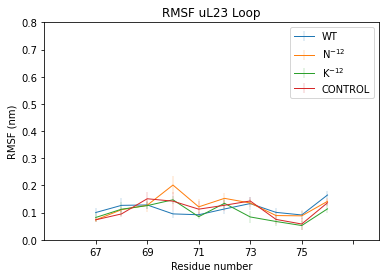

In [69]:
#fig,ax = plt.subplots(3,2, figsize=(3*3,2*3))

#ax=ax.flatten()
#counter=0


for item in SYSTEMS:
    #ax[counter]=plot_panda_boots_comparison_RNA_4comp_V2(rmsfdir,'WT','N13','K13','CONTROL',5,
    #                               'RMSF '+item,item)
    
    plot_panda_boots_comparison_RNA_4comp_V2(rmsfdir,'WT','N13','K13','CONTROL',5,
                                    'RMSF '+item,item)
    #counter+=1
    
#plt.show()

### Notes

I want to improve these plots. 
I can change the residue numbering by including only the residue number
Increase size of labels, change font to Arial 